<a href="https://colab.research.google.com/github/KrzysztofDrobnik/PUM_Ptojekt_2025/blob/main/Project_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import potrzebnych bilbiotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#wczytanie pliku z danymi
df = pd.read_csv('taxi_trip_pricing (1).csv')

In [7]:
#podstawowe miary statystyczne
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [8]:
#sprawdzenie podstawowych danych o df
wiersze, kolumny = df.shape
print("Liczba wierszy:", wiersze)
print("Liczba kolumn:", kolumny)

df.info()

Liczba wierszy: 1000
Liczba kolumn: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [9]:
#usunięcie dupilkatów danych
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [10]:
#połaczenie zmiennych "Per_Minute_Rate" oraz "Trip_Duration_Minutes" w jedną zmienną będącą ich iloczynem
df["Time_Cost"] = df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"]
df.drop(columns=["Per_Minute_Rate", "Trip_Duration_Minutes"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    950 non-null    float64
 1   Time_of_Day         950 non-null    object 
 2   Day_of_Week         950 non-null    object 
 3   Passenger_Count     950 non-null    float64
 4   Traffic_Conditions  950 non-null    object 
 5   Weather             950 non-null    object 
 6   Base_Fare           950 non-null    float64
 7   Per_Km_Rate         950 non-null    float64
 8   Trip_Price          951 non-null    float64
 9   Time_Cost           902 non-null    float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


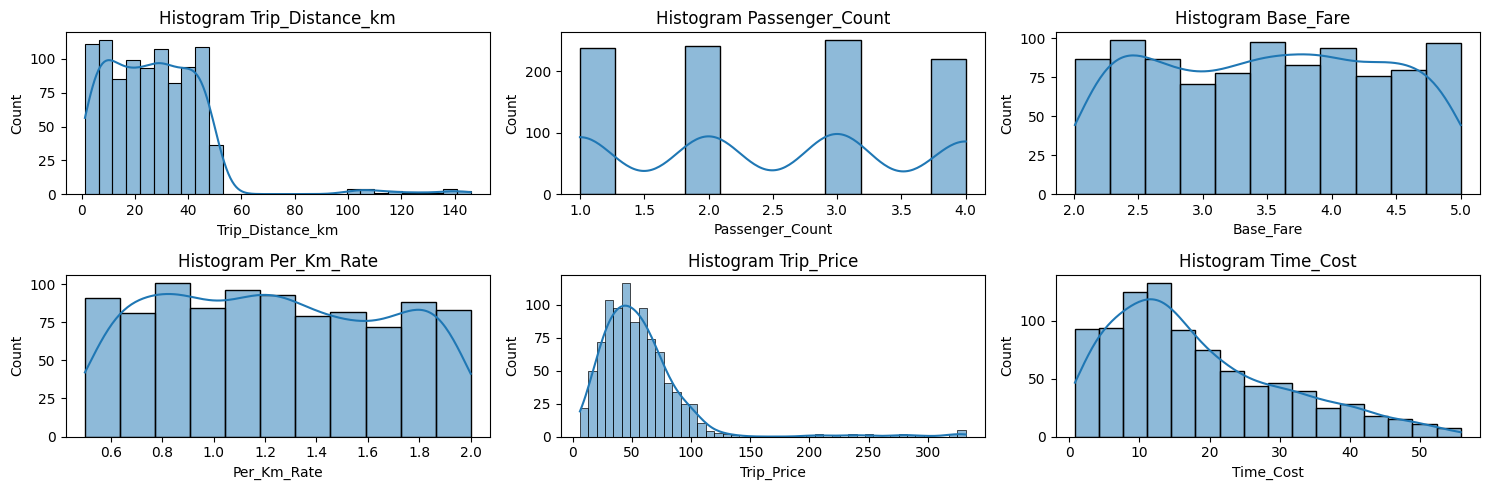

In [11]:
#sprawdzanie rozkładów zmiennych w celu stwierdzenie czy lepiej zastąpić wartości puste średnią czy medianą (lub ewentualnie inną statystyką)
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

sns.histplot(df['Trip_Distance_km'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histogram Trip_Distance_km')

sns.histplot(df['Passenger_Count'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Histogram Passenger_Count')

sns.histplot(df['Base_Fare'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Histogram Base_Fare  ')

sns.histplot(df['Per_Km_Rate'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Histogram Per_Km_Rate')

sns.histplot(df['Trip_Price'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Histogram Trip_Price')

sns.histplot(df['Time_Cost'], ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Histogram Time_Cost')

plt.tight_layout()
plt.show()

In [12]:
#rozkład zmiennej Trip_Distance_km - skośny prawostronnie - najlepiej zastąpić wartości puste medianą
#rozkład zmiennej Passenger_Count - zmienna dyskretna, przyjmowane wartości z kilku możliwych opcji - najlepiej zastąpić wartości puste modą
#rozkład zmiennej Base_Fare - bez silnych skośności - najlepiej zastąpić wartości puste średnią
#rozkład zmiennej Per_Km_Rate - bez silnych skośności - najlepiej zastąpić wartości puste średnią
#rozkład zmiennej Trip_Price - skośny prawostronnie - najlepiej zastąpić wartości puste medianą
#rozkłąd zmiennej Time_Cost - skośnt prawostronnie - najlepiej zastąpić wartości puste medianą

trip_distance_median = df['Trip_Distance_km'].median()
passenger_count_mode = df['Passenger_Count'].mode()[0]
base_fare_mean = df['Base_Fare'].mean()
per_km_rate_mean = df['Per_Km_Rate'].mean()
trip_price_median = df['Trip_Price'].median()
time_cost_median = df['Time_Cost'].median()

df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(trip_distance_median)
df['Passenger_Count'] = df['Passenger_Count'].fillna(passenger_count_mode)
df['Base_Fare'] = df['Base_Fare'].fillna(base_fare_mean)
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(per_km_rate_mean)
df['Trip_Price'] = df['Trip_Price'].fillna(trip_price_median)
df['Time_Cost'] = df['Time_Cost'].fillna(time_cost_median)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    1000 non-null   float64
 1   Time_of_Day         950 non-null    object 
 2   Day_of_Week         950 non-null    object 
 3   Passenger_Count     1000 non-null   float64
 4   Traffic_Conditions  950 non-null    object 
 5   Weather             950 non-null    object 
 6   Base_Fare           1000 non-null   float64
 7   Per_Km_Rate         1000 non-null   float64
 8   Trip_Price          1000 non-null   float64
 9   Time_Cost           1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [13]:
#sprawdzenie wartości dla zmiennych tekstowych
text_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for column in text_columns:
    print(df[column].value_counts())
    print("\n")

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64


Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64


Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64


Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64




In [14]:
#sprawdzenie jaki procent danych stanowią brakujące dane
braki_procent = df.isnull().sum() / len(df) * 100
braki_procent = braki_procent[braki_procent > 0]
print(braki_procent)


Time_of_Day           5.0
Day_of_Week           5.0
Traffic_Conditions    5.0
Weather               5.0
dtype: float64


In [15]:
#Pozbycie sie nulli - usuniecie pozycji z dataframe'a. I tak jest ich dużo wiec jak te 5 % zniknie to nic nie powinno się stać

df.dropna(inplace=True)

In [31]:
#zmienne tekstowe na zmienne numeryczne
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

print(df.head())

   Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  \
0             19.35            2            0              3.0   
1             47.59            0            0              1.0   
2             36.87            1            1              1.0   
4             25.83            1            0              3.0   
5              8.64            0            1              2.0   

   Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Trip_Price  Time_Cost  
0                   1        0   3.560000         0.80     36.2624    17.2224  
1                   0        0   3.502989         0.62     50.0745    17.4451  
2                   0        0   2.700000         1.21     52.9032     5.5905  
4                   0        0   2.930000         0.63     15.6180     7.2448  
5                   2        0   2.550000         1.71     60.2028    42.8784  


In [32]:
#IQR -  tak jak bylo na zajeciach

Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [33]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Trip_Price,Time_Cost
0,19.35,2,0,3.0,1,0,3.560000,0.80,36.2624,17.2224
1,47.59,0,0,1.0,0,0,3.502989,0.62,50.0745,17.4451
2,36.87,1,1,1.0,0,0,2.700000,1.21,52.9032,5.5905
4,25.83,1,0,3.0,0,0,2.930000,0.63,15.6180,7.2448
5,8.64,0,1,2.0,2,0,2.550000,1.71,60.2028,42.8784


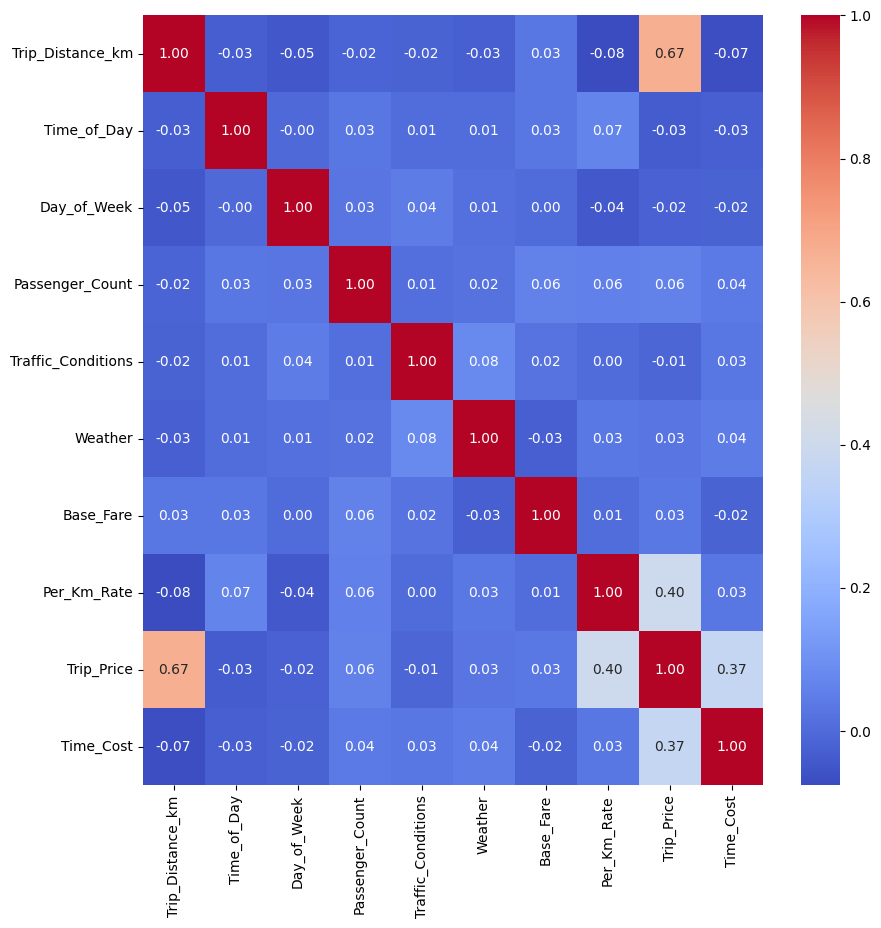

In [ ]:
# Korelacja



corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


#WAŻNE - zmienna celu to Trip_price, więc korelacja z nia moze byc
#Moze byc Time_cost do usuniecia, sprawdzamy to VIF'em

In [ ]:
#VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

y = df['Trip_Price']
X = df.drop(columns=['Trip_Price'])

vif_data = pd.DataFrame()
vif_data["variables"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
print(vif_data)

#BASE FARE DO WYRZUCENIA - VIF > 10. PER_KM_RATE > 7 - też do wyrzucenia. 
#Reszta to mała współliniowosć, wiec powinno być git po usunięciu tych dwóch elementów

            variables        VIF
0    Trip_Distance_km   3.814435
1         Time_of_Day   2.101440
2         Day_of_Week   1.477205
3     Passenger_Count   5.926033
4  Traffic_Conditions   3.593504
5             Weather   1.369160
6           Base_Fare  11.390991
7         Per_Km_Rate   7.906408
8           Time_Cost   3.423130


In [42]:
df.drop(
    columns = [ 'Base_Fare', 'Per_Km_Rate'],
    inplace = True,
)



In [ ]:
y = df['Trip_Price']
X = df.drop(columns=['Trip_Price'])

vif_data = pd.DataFrame()
vif_data["variables"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
print(vif_data)

#Gitówa 

            variables       VIF
0    Trip_Distance_km  3.210224
1         Time_of_Day  1.974742
2         Day_of_Week  1.456475
3     Passenger_Count  4.557985
4  Traffic_Conditions  3.252495
5             Weather  1.360130
6           Time_Cost  3.077691


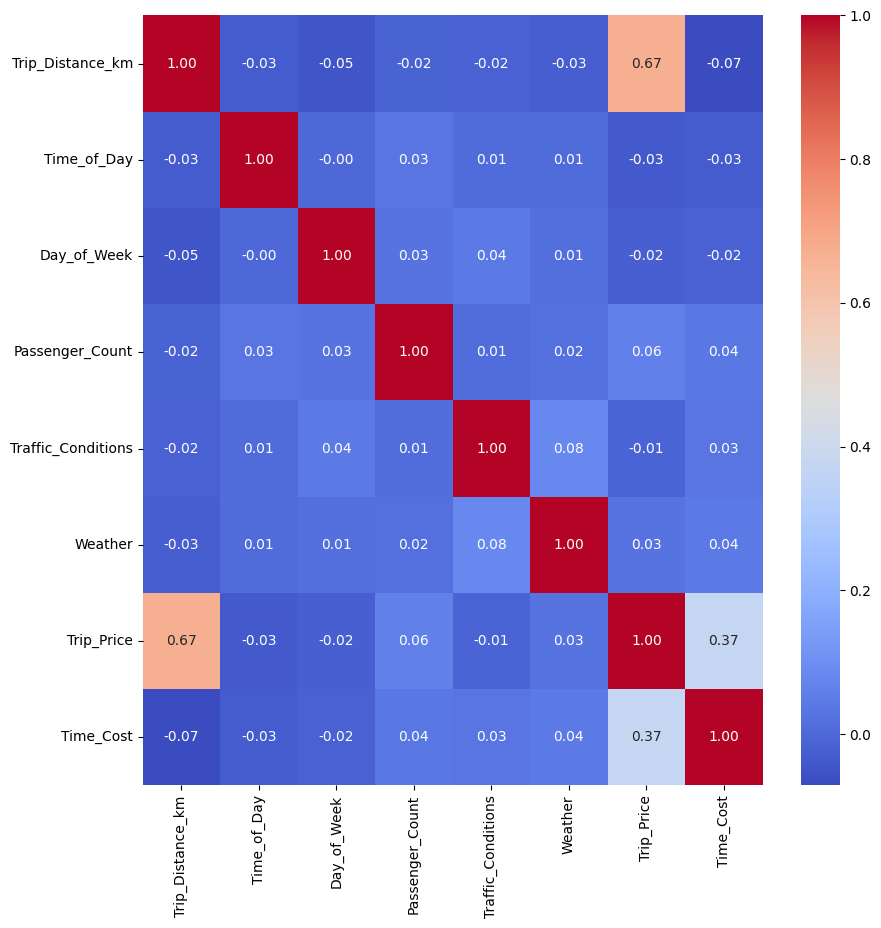

In [ ]:
# Korelacja - próba 2


corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()




In [49]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Price,Time_Cost
0,19.35,2,0,3.0,1,0,36.2624,17.2224
1,47.59,0,0,1.0,0,0,50.0745,17.4451
2,36.87,1,1,1.0,0,0,52.9032,5.5905
4,25.83,1,0,3.0,0,0,15.6180,7.2448
5,8.64,0,1,2.0,2,0,60.2028,42.8784


In [ ]:
#standaryzacja

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled  = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


df_scaled.head()

#Chyba jest git 0 nie ma jakiś super odstajacych wartosci

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Price,Time_Cost
0,-0.414622,0.867560,-0.701539,0.446850,-0.301282,-0.600167,-0.644905,0.065156
1,1.601794,-1.057259,-0.701539,-1.396254,-1.657941,-0.600167,-0.018419,0.086947
2,0.836355,-0.094850,1.425438,-1.396254,-1.657941,-0.600167,0.109884,-1.073015
3,0.048068,-0.094850,-0.701539,0.446850,-1.657941,-0.600167,-1.581289,-0.911143
4,-1.179347,-1.057259,1.425438,-0.474702,1.055378,-0.600167,0.440978,2.575573


Co dalej?
- przeskalowanie danych? - przez to że nasz problem jest ciągły trzeba to zrobić, bo mozna wykorzystac wtedy gradient 
- badanie korelacji i ewentualne usunięcie zmiennych? - gotowe, jeszcze niech ktos zweryfikuje :>

Wedługm mnie wszystko już jest, trzeba się wziąć za zrobienie modelu